Designed by Federica Bianco:

visualization homework

improving plots

2019 version: DSPS UDel 

In [ ]:
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
# you will use astropy to make the contours-scatter plot
from astropy import constants as const
from astropy import units as u
pylab.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/fbb.mplstyle")

# high density to contours examples

## get data on  star data from kepler2 mission

In [ ]:

url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"
url +="?table=k2targets&select=epic_number,k2_teff,k2_rad"
url +="&format=CSV"



In [ ]:
df = pd.read_csv(url)
df.head()

,epic_number,k2_teff,k2_rad
0,60018365,NaN,NaN
1,60018369,NaN,NaN
2,60018371,NaN,NaN
3,60018372,NaN,NaN
4,60018374,NaN,NaN


In [ ]:
df.columns

Index(['epic_number', 'k2_teff', 'k2_rad'], dtype='object')

## Add a column for the star luminosity in Watts
follow [this description](http://personal.psu.edu/mxe17/A010/lectures/lect19.html) Section 2


The luminosity of the star is $4 ~ \pi ~ r^2 ~\sigma~ T^4$
with $\sigma$ Boltzmann constand, $T$ temperature, $r$ radius of the star. 

Note that the radius is given in sun radii, use ```const.R_sun``` to get the radius in natural units instead.

In [ ]:
df["luminosity"] = 4 * np.pi * ((const.R_sun * df["k2_rad"]) ** 2) * const.sigma_sb * (df["k2_teff"] ** 4)
#Adding a column for luminosity in (Watts)

In [ ]:
df.columns

Index(['epic_number', 'k2_teff', 'k2_rad', 'luminosity'], dtype='object')

In [ ]:
df.shape

(392245, 4)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(236850, 4)

## Plot the HR diagram:

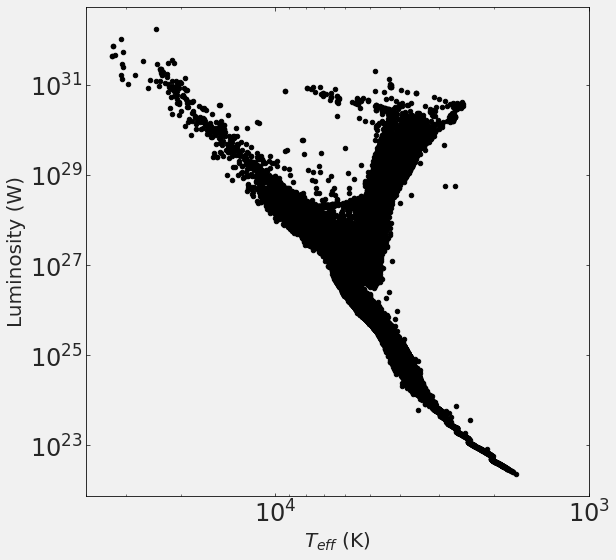

In [ ]:
df.plot.scatter("k2_teff", "luminosity", s = 20, c = 'k', loglog = True, figsize = (9,9))
# s: marker size
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');


## Plot the HR diagram using transparency to better the readability of the plot:

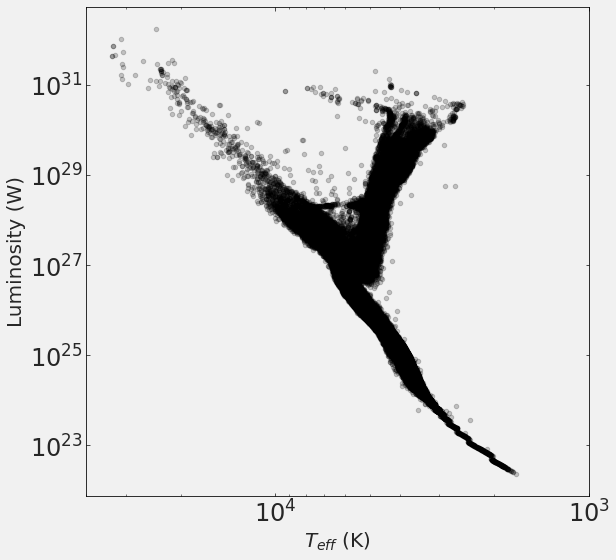

In [ ]:

df.plot.scatter("k2_teff", "luminosity", s = 20, c = 'k', loglog = True, figsize = (9,9), alpha = 0.2)
plt.xlim(40000, 1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');


## AstroML version

In [ ]:
!pip install astroML

     |████████████████████████████████| 112kB 9.0MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp37-none-any.whl size=128664 sha256=6a3a2a190aeb0d6dcddcc7a5e61c3347862c90cd73e34a0ea8bae99bc0162557
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [ ]:
from astroML import plotting
plotting.scatter_contour?

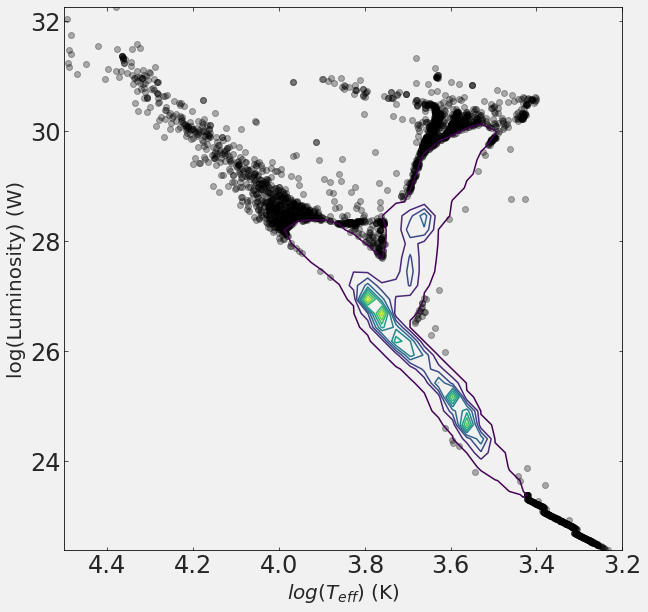

In [ ]:

#rememnber that you are making a log-log plot
ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(ax = ax, x = np.log10(df["k2_teff"]), y = np.log10(df["luminosity"]),
                         filled_contour = False,
                         histogram2d_args = {'bins': (40, 40)},
                         plot_args = {'marker': 'o', 'alpha': 0.3, 'color': 'k'},
                         contour_args = {})

plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)')
plt.xlim(4.5, 3.2)
plt.savefig("k2scatter_contour.png")

In [ ]:
#change the contour parameters till it looks good
plt.contourf?

# by-hand version

Here is how you would do this by hand.

In [ ]:
H, xbins, ybins = np.histogram2d(np.log10(teff_na), np.log10(L_na), bins=(40, 40))
Hsort = np.sort(H.flatten())

In [ ]:
extent = #
levels = np.linspace(...)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)


plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');

In [ ]:
extent = #
levels = np.linspace(...)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)

X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])

if len(outline.allsegs[0]) > 0:
    outer_poly = outline.allsegs[0][0]
    try:
        # this works in newer matplotlib versions
        from matplotlib.path import Path
        points_inside = Path(outer_poly).contains_points(X)
    except:
        # this works in older matplotlib versions
        import matplotlib.nxutils as nx
        points_inside = nx.points_inside_poly(X, outer_poly)

    Xplot = X[~points_inside]
else:
    Xplot = X

axc = contourf(H.T, extent=extent, levels=levels, 
               linewidths=3, cmap='winter', alpha=0.7)

plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');